<a href="https://colab.research.google.com/github/Nickhilll/Machine-Learning/blob/main/NeuralNetworksRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks Regression

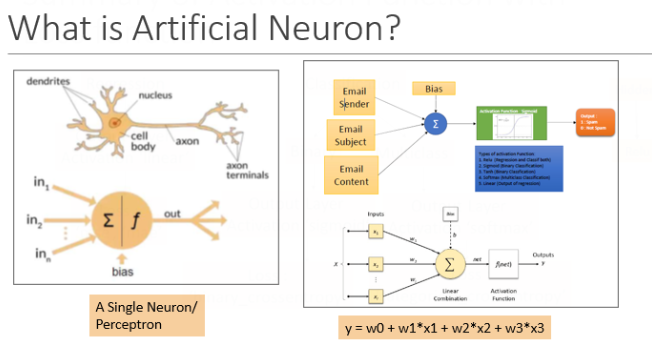

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step1 - Data Ingestion

In [ ]:
url = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv'
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [ ]:
import pandas as pd
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## step2 - Check basic data quality

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


1. AT - Atmosphere Temperature in degree celsius
2. V - Vacuum Pressure bars
3. AP - Atmospheric Pressure
4. RH - Relative Humidity %
5. PE (Target) - Power Output in mega Watt

In [ ]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [ ]:
df.duplicated().sum()

41

In [ ]:
df = df.drop_duplicates(keep = 'first').reset_index(drop = True)
df.shape

(9527, 5)

In [ ]:
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9522,15.12,48.92,1011.80,72.93,462.59
9523,33.41,77.95,1010.30,59.72,432.90
9524,15.99,43.34,1014.20,78.66,465.96
9525,17.65,59.87,1018.58,94.65,450.93


## Step 3 - Separate X and Y

In [ ]:
X = df.drop(columns = ['PE'])
Y = df[['PE']]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Step 4 - Apply Preprocessing on X

In [ ]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = 'median'),
    StandardScaler()
).set_output(transform = 'pandas')

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837
...,...,...,...,...
9522,-0.609648,-0.423583,-0.241925,-0.027724
9523,1.847362,1.864831,-0.494441,-0.932100
9524,-0.492776,-0.863450,0.162101,0.364561
9525,-0.269777,0.439598,0.899448,1.459261


## Step 5 - Train test Split

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size = 0.2, random_state=42)

In [ ]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [ ]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [ ]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [ ]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [ ]:
xtrain.shape

(7621, 4)

In [ ]:
xtest.shape

(1906, 4)

In [ ]:
xtrain.shape[1]

4

## Step 6- Build the neural network


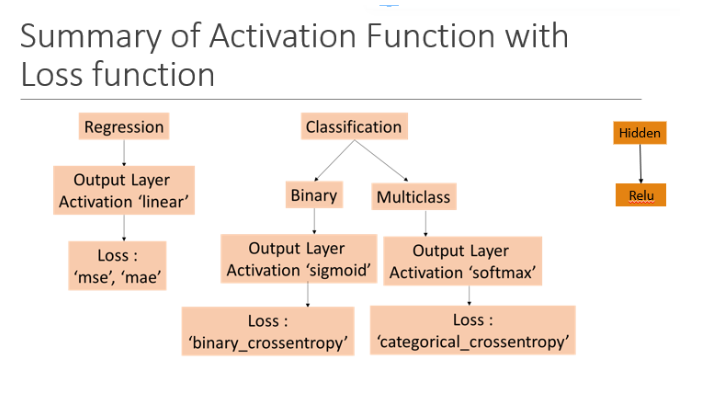

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [ ]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(8, activation="relu"),
        Dense(4, activation="relu"),
        Dense(1, activation="linear")
    ]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])


In [ ]:
hist = model.fit(xtrain, ytrain, epochs=60, validation_split=0.2)


Epoch 1/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 207038.8750 - mae: 454.6935 - val_loss: 205558.7188 - val_mae: 453.0623
Epoch 2/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 206262.8750 - mae: 453.8475 - val_loss: 202890.9375 - val_mae: 450.1308
Epoch 3/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 201797.9844 - mae: 448.9521 - val_loss: 192896.4219 - val_mae: 439.0491
Epoch 4/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 189037.8594 - mae: 434.6254 - val_loss: 172579.5156 - val_mae: 415.1227
Epoch 5/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 165935.4531 - mae: 406.6184 - val_loss: 144744.1250 - val_mae: 377.9365
Epoch 6/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 136697.3438 - mae: 365.6560 - val_loss: 115958.9844 - val_mae: 330.9075
Epoch 7/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 108473.5859 - mae: 316.4382 - val_loss: 92453.6562 - val_mae: 282.1005
Epoch 8/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 86040.1484 - mae:

## Check learning curve

In [ ]:
import matplotlib.pyplot as plt

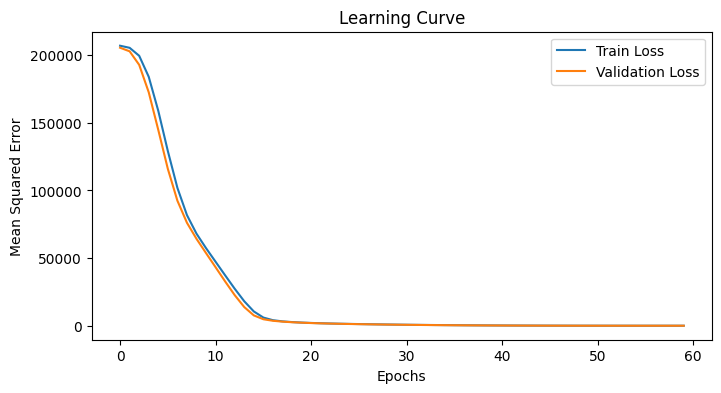

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

## Model Evaluation

In [ ]:
model.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21.9261 - mae: 3.7267


[21.895151138305664, 3.6896369457244873]

In [ ]:
model.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.3015 - mae: 3.6837


[22.548646926879883, 3.755341053009033]

In [ ]:
from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [ ]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")

In [ ]:
print("Train Results :")
evaluate_model(model, xtrain, ytrain)

Train Results :
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RMSE : 4.68
MAE : 3.69
MAPE : 0.81%
R2 : 92.38%


In [ ]:
print("Test Results :")
evaluate_model(model, xtest, ytest)

Test Results :
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE : 4.75
MAE : 3.76
MAPE : 0.83%
R2 : 92.53%


In [ ]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[426.98233],
       [480.5945 ],
       [482.12384],
       [449.8442 ],
       [447.06906]], dtype=float32)

In [ ]:
ytest.head()


,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


## R2 Scores > 0.8 hence it is a good model

## Out of sample prediction


In [ ]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [ ]:
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [ ]:
xnew.shape

(100, 4)

In [ ]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [ ]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[445.2034 ],
       [439.5554 ],
       [430.47714],
       [439.9161 ],
       [472.91318]], dtype=float32)

In [ ]:
xnew["PE_pred"] = preds

In [ ]:
xnew = xnew.round(2)

In [ ]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.200012
1,28.88,54.89,1007.16,46.60,439.559998
2,27.89,73.21,1001.32,85.88,430.480011
3,25.69,62.26,1011.38,74.08,439.920013
4,12.16,40.81,1025.79,70.97,472.910004
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.179993
96,11.78,39.96,1011.37,82.95,471.200012
97,5.62,41.38,1020.91,86.21,482.829987
98,24.96,74.99,1008.25,80.52,436.920013


In [ ]:
xnew.to_csv("Results.csv", index=False)